In [ ]:
import os
import cv2
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Directories for the images

# Directories for each class
kapha_dir = r'C:\Users\kaush\Downloads\eyes dataset\train\kapha'
pittha_dir = r'C:\Users\kaush\Downloads\eyes dataset\train\pittha'
vata_dir = r'C:\Users\kaush\Downloads\eyes dataset\train\vata'



# Load and preprocess images
def load_images_from_folder(folder, label):
    images = []
    for filename in os.listdir(folder):
        img = cv2.imread(os.path.join(folder, filename))
        if img is not None:
            img = cv2.resize(img, (128, 128))  # Resize to 128x128
            images.append((img, label))  # Append image and its label as tuple
    return images

# Load images
kapha_images = load_images_from_folder(kapha_dir, 0)  
pittha_images = load_images_from_folder(pittha_dir, 1) 
vata_images =load_images_from_folder(vata_dir, 2) 


# Data Augmentation
import cv2
import random

import cv2
import random
import numpy as np

def augment_images(images, label):
    augmented_images = []
    for img, _ in images:
        # Get image dimensions
        h, w = img.shape[:2]
        
        # Random cropping
        x_start = random.randint(0, int(0.1 * w))  # Random start for the x-axis
        y_start = random.randint(0, int(0.1 * h))  # Random start for the y-axis
        cropped_img = img[y_start:y_start + h - 20, x_start:x_start + w - 20]
        cropped_img = cv2.resize(cropped_img, (w, h))  # Resize back to original dimensions
        augmented_images.append((cropped_img, label))
        
        # Scaling
        scaled_img = cv2.resize(img, None, fx=1.2, fy=1.2, interpolation=cv2.INTER_LINEAR)
        scaled_img = cv2.resize(scaled_img, (w, h))  # Resize back to original dimensions
        augmented_images.append((scaled_img, label))
        
        # Random perspective transformation
        pts1 = np.float32([[0, 0], [w-1, 0], [0, h-1], [w-1, h-1]])  # Original points
        pts2 = np.float32([[random.randint(0, w//4), random.randint(0, h//4)],
                           [random.randint(w-1-w//4, w-1), random.randint(0, h//4)],
                           [random.randint(0, w//4), random.randint(h-1-h//4, h-1)],
                           [random.randint(w-1-w//4, w-1), random.randint(h-1-h//4, h-1)]])  # Transformed points
        matrix = cv2.getPerspectiveTransform(pts1, pts2)
        perspective_img = cv2.warpPerspective(img, matrix, (w, h))
        augmented_images.append((perspective_img, label))
         # Random cropping
        x_start = random.randint(0, int(0.1 * w))  # Random start for the x-axis
        y_start = random.randint(0, int(0.1 * h))  # Random start for the y-axis
        cropped_img = img[y_start:y_start + h - 20, x_start:x_start + w - 20]
        cropped_img = cv2.resize(cropped_img, (w, h))  # Resize back to original dimensions
        augmented_images.append((cropped_img, label))
        
        # Scaling
        scaled_img = cv2.resize(img, None, fx=1.2, fy=1.2, interpolation=cv2.INTER_LINEAR)
        scaled_img = cv2.resize(scaled_img, (w, h))  # Resize back to original dimensions
        augmented_images.append((scaled_img, label))
        
        # Random perspective transformation
        pts1 = np.float32([[0, 0], [w-1, 0], [0, h-1], [w-1, h-1]])  # Original points
        pts2 = np.float32([[random.randint(0, w//4), random.randint(0, h//4)],
                           [random.randint(w-1-w//4, w-1), random.randint(0, h//4)],
                           [random.randint(0, w//4), random.randint(h-1-h//4, h-1)],
                           [random.randint(w-1-w//4, w-1), random.randint(h-1-h//4, h-1)]])  # Transformed points
        matrix = cv2.getPerspectiveTransform(pts1, pts2)
        perspective_img = cv2.warpPerspective(img, matrix, (w, h))
        augmented_images.append((perspective_img, label))

    return augmented_images



# Apply 
augmented_kapha_images = augment_images(kapha_images, 0)  # Label 0 for benign
augmented_pittha_images = augment_images(pittha_images, 1)  # Label 1 for malignant
augmented_vata_images = augment_images(vata_images, 2)  # Label 1 for malignant

# Combine original and augmented images
data = kapha_images + pittha_images + vata_images + augmented_pittha_images+augmented_kapha_images+augmented_vata_images
X, y = zip(*data)  # Unzip the list of tuples into separate lists
X = np.array(X)
y = np.array(y)


# Normalize images for VGG-16
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

import tensorflow as tf
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
X = X / 255.0  # Scale pixel values to [0, 1]

# Reshape X to 128x128x3 for VGG-16 input (duplicate channels if grayscale)
X_reshaped = np.repeat(X, 3, axis=-1) if X.shape[-1] == 1 else X

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_reshaped, y, test_size=0.2, random_state=42)

Epoch 1/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 34s 978ms/step - accuracy: 0.3658 - loss: 2.4736 - val_accuracy: 0.5254 - val_loss: 0.8952
Epoch 2/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 17s 736ms/step - accuracy: 0.5886 - loss: 0.9639 - val_accuracy: 0.7345 - val_loss: 0.6238
Epoch 3/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 17s 728ms/step - accuracy: 0.7587 - loss: 0.6008 - val_accuracy: 0.8023 - val_loss: 0.5191
Epoch 4/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 16s 715ms/step - accuracy: 0.7822 - loss: 0.5049 - val_accuracy: 0.8136 - val_loss: 0.5326
Epoch 5/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 16s 707ms/step - accuracy: 0.7916 - loss: 0.4897 - val_accuracy: 0.8531 - val_loss: 0.3936
Epoch 6/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 17s 747ms/step - accuracy: 0.8429 - loss: 0.3978 - val_accuracy: 0.8475 - val_loss: 0.4806
Epoch 7/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 17s 746ms/step - accuracy: 0.8922 - loss: 0.2997 - val_accuracy: 0.8249 - val_loss: 0.3754
Epoch 8/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 16s 719ms/step - accuracy: 0.8402 - loss: 0.3881 - val_accu

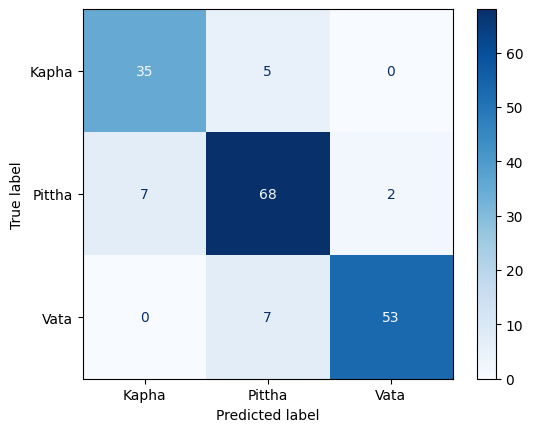

Accuracy: 88.14%


In [3]:
import os
import cv2
import numpy as np
import random
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score
import tensorflow as tf
from tensorflow.keras.applications import DenseNet121
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Flatten, Dense, Dropout, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt

# Build the DenseNet121 model
base_model = DenseNet121(weights='imagenet', include_top=False, input_shape=(128, 128, 3))

# Freeze the base model layers
base_model.trainable = False

# Add custom classification layers on top of DenseNet121
x = GlobalAveragePooling2D()(base_model.output)  # Use global average pooling instead of flattening
x = Dense(256, activation='relu')(x)  # Dense layer for feature learning
x = Dropout(0.5)(x)  # Dropout to prevent overfitting
output_layer = Dense(3, activation='softmax')(x)  # Output layer for 3 classes
model = Model(inputs=base_model.input, outputs=output_layer)

# Compile the model
model.compile(optimizer=Adam(), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

# Evaluate the model on test data
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)

# Confusion Matrix and Accuracy Score
cm = confusion_matrix(y_test, y_pred_classes)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Kapha', 'Pittha', 'Vata'])
disp.plot(cmap=plt.cm.Blues)
plt.show()

accuracy = accuracy_score(y_test, y_pred_classes)
print(f'Accuracy: {accuracy * 100:.2f}%')


In [4]:
# Save the model to a file
model.save("densenet121_best_model.h5")


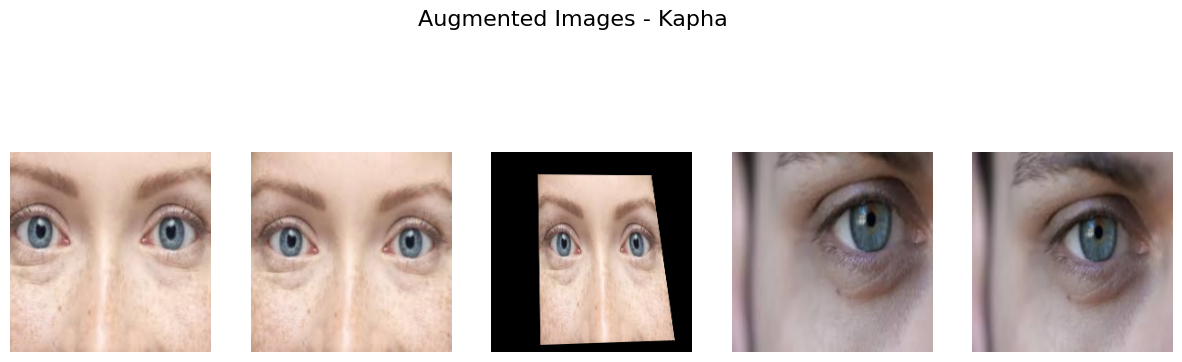

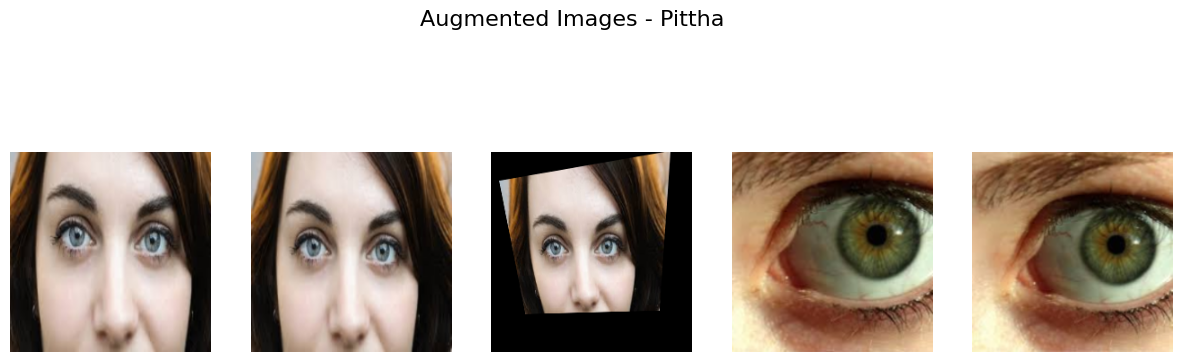

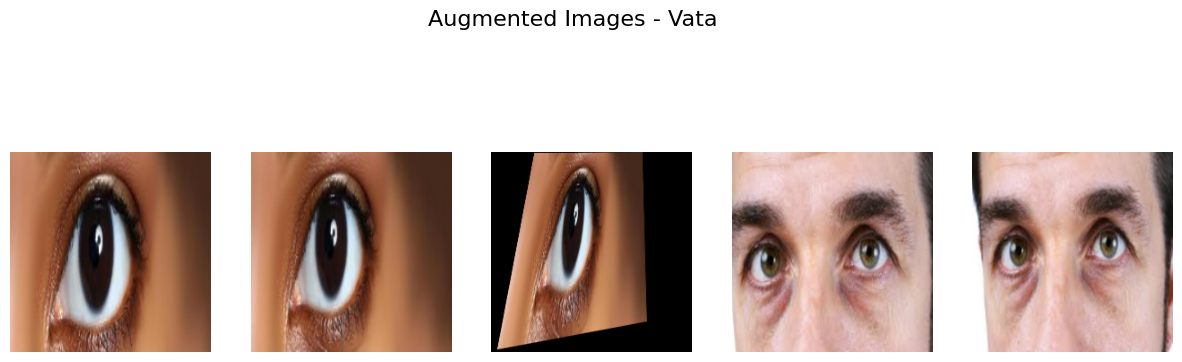

In [ ]:
import os
import cv2
import numpy as np
import random
import matplotlib.pyplot as plt

# Directories for each class
kapha_dir = r'C:\Users\kaush\Downloads\eyes dataset\train\kapha'
pittha_dir = r'C:\Users\kaush\Downloads\eyes dataset\train\pittha'
vata_dir = r'C:\Users\kaush\Downloads\eyes dataset\train\vata'

# Load and preprocess images
def load_images_from_folder(folder, label):
    images = []
    for filename in os.listdir(folder):
        img = cv2.imread(os.path.join(folder, filename))
        if img is not None:
            img = cv2.resize(img, (128, 128))  # Resize to 224x224
            images.append((img, label))  # Append image and its label as tuple
    return images

# Load images
kapha_images = load_images_from_folder(kapha_dir, 0)  
pittha_images = load_images_from_folder(pittha_dir, 1) 
vata_images = load_images_from_folder(vata_dir, 2)

# Data Augmentation
def augment_images(images, label):
    augmented_images = []
    for img, _ in images:
        h, w = img.shape[:2]
        
        # Random cropping
        x_start = random.randint(0, int(0.1 * w))
        y_start = random.randint(0, int(0.1 * h))
        cropped_img = img[y_start:y_start + h - 20, x_start:x_start + w - 20]
        cropped_img = cv2.resize(cropped_img, (w, h))
        augmented_images.append((cropped_img, label))
        
        # Scaling
        scaled_img = cv2.resize(img, None, fx=1.2, fy=1.2, interpolation=cv2.INTER_LINEAR)
        scaled_img = cv2.resize(scaled_img, (w, h))
        augmented_images.append((scaled_img, label))
        
        # Random perspective transformation
        pts1 = np.float32([[0, 0], [w-1, 0], [0, h-1], [w-1, h-1]])
        pts2 = np.float32([
            [random.randint(0, w//4), random.randint(0, h//4)],
            [random.randint(w-1-w//4, w-1), random.randint(0, h//4)],
            [random.randint(0, w//4), random.randint(h-1-h//4, h-1)],
            [random.randint(w-1-w//4, w-1), random.randint(h-1-h//4, h-1)]
        ])
        matrix = cv2.getPerspectiveTransform(pts1, pts2)
        perspective_img = cv2.warpPerspective(img, matrix, (w, h))
        augmented_images.append((perspective_img, label))

    return augmented_images

# Apply augmentation
augmented_kapha_images = augment_images(kapha_images, 0)
augmented_pittha_images = augment_images(pittha_images, 1)
augmented_vata_images = augment_images(vata_images, 2)

# Combine original and augmented images
data = kapha_images + pittha_images + vata_images + augmented_kapha_images + augmented_pittha_images + augmented_vata_images
X, y = zip(*data)  # Unzip the list of tuples into separate lists
X = np.array(X)
y = np.array(y)

# Normalize images
X = X / 255.0  # Scale pixel values to [0, 1]

# Reshape X to 224x224x3 for DenseNet121 input
X_reshaped = np.repeat(X, 3, axis=-1) if X.shape[-1] == 1 else X

# Collect and display augmented images for Kapha class
def display_augmented_images(images, title, count=5):
    """
    Display a specific number of augmented images from a list.
    """
    fig, axes = plt.subplots(1, count, figsize=(15, 5))
    fig.suptitle(title, fontsize=16)
    for i in range(count):
        ax = axes[i]
        ax.imshow(cv2.cvtColor(images[i][0], cv2.COLOR_BGR2RGB))  # Only show the image, not the label
        ax.axis('off')
    plt.show()

# Display augmented images
display_augmented_images(augmented_kapha_images[:5], "Augmented Images - Kapha")
display_augmented_images(augmented_pittha_images[:5], "Augmented Images - Pittha")
display_augmented_images(augmented_vata_images[:5], "Augmented Images - Vata")


1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step


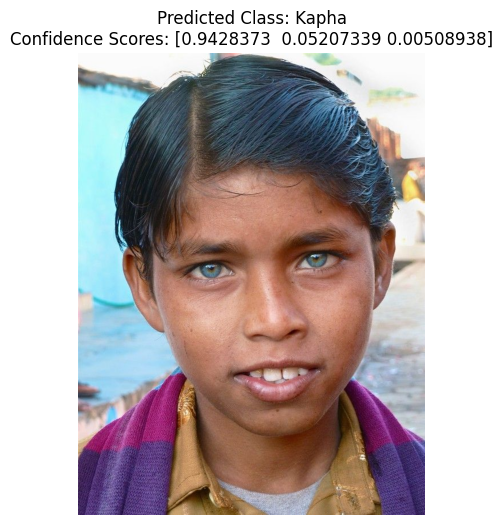

In [8]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model

# Load the saved DenseNet121 model
model_path = 'densenet121_best_model.h5'  # Replace with the actual path to your saved model
model = load_model(model_path)

def predict_and_display_image(image_path, model):
    """
    Predict the class of a single image using the loaded DenseNet121 model and display it.
    
    Parameters:
        image_path (str): Path to the image to predict.
        model (tensorflow.keras.Model): The trained DenseNet121 model.
    
    Returns:
        None
    """
    # Load the image
    img = cv2.imread(image_path)
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert BGR (OpenCV) to RGB (Matplotlib)
    
    # Resize the image to 224x224
    img_resized = cv2.resize(img, (128, 128))
    
    # Normalize the image (scale pixel values to [0, 1])
    img_resized = img_resized / 255.0
    
    # Ensure the image has 3 channels (for RGB), repeat if grayscale
    if img_resized.shape[-1] == 1:  # If the image is grayscale
        img_resized = np.repeat(img_resized, 3, axis=-1)
    
    # Add an extra dimension for the batch size (1 image in this case)
    img_input = np.expand_dims(img_resized, axis=0)
    
    # Predict with the model
    predictions = model.predict(img_input)
    
    # Get the class with the highest probability
    predicted_class = np.argmax(predictions, axis=1)
    
    # Map the predicted class to its label
    class_labels = ['Kapha', 'Pittha', 'Vata']
    predicted_label = class_labels[predicted_class[0]]
    
    # Display the image and prediction
    plt.figure(figsize=(6, 6))
    plt.imshow(img_rgb)
    plt.title(f"Predicted Class: {predicted_label}\nConfidence Scores: {predictions[0]}")
    plt.axis('off')
    plt.show()

# Example usage:
image_path = "C:/Users/kaush/Downloads/f376a5fca76fc505efa982ec34485be0.jpg"  # Replace with the actual path to your test image
predict_and_display_image(image_path, model)


1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step


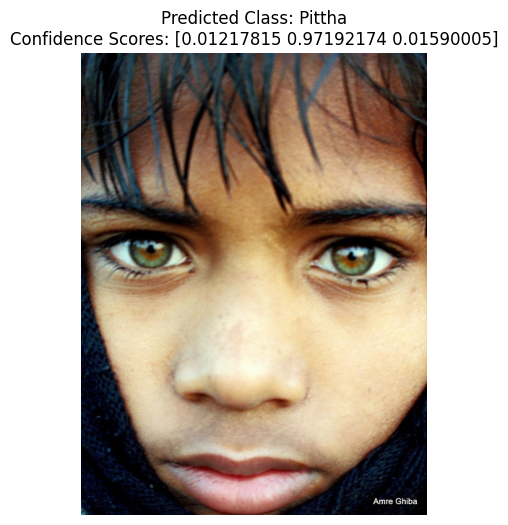

In [9]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model

# Load the saved DenseNet121 model
model_path = 'densenet121_best_model.h5'  # Replace with the actual path to your saved model
model = load_model(model_path)

def predict_and_display_image(image_path, model):
    """
    Predict the class of a single image using the loaded DenseNet121 model and display it.
    
    Parameters:
        image_path (str): Path to the image to predict.
        model (tensorflow.keras.Model): The trained DenseNet121 model.
    
    Returns:
        None
    """
    # Load the image
    img = cv2.imread(image_path)
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert BGR (OpenCV) to RGB (Matplotlib)
    
    # Resize the image to 224x224
    img_resized = cv2.resize(img, (128, 128))
    
    # Normalize the image (scale pixel values to [0, 1])
    img_resized = img_resized / 255.0
    
    # Ensure the image has 3 channels (for RGB), repeat if grayscale
    if img_resized.shape[-1] == 1:  # If the image is grayscale
        img_resized = np.repeat(img_resized, 3, axis=-1)
    
    # Add an extra dimension for the batch size (1 image in this case)
    img_input = np.expand_dims(img_resized, axis=0)
    
    # Predict with the model
    predictions = model.predict(img_input)
    
    # Get the class with the highest probability
    predicted_class = np.argmax(predictions, axis=1)
    
    # Map the predicted class to its label
    class_labels = ['Kapha', 'Pittha', 'Vata']
    predicted_label = class_labels[predicted_class[0]]
    
    # Display the image and prediction
    plt.figure(figsize=(6, 6))
    plt.imshow(img_rgb)
    plt.title(f"Predicted Class: {predicted_label}\nConfidence Scores: {predictions[0]}")
    plt.axis('off')
    plt.show()

# Example usage:
image_path = "C:/Users/kaush/Downloads/704ec85652631ad89c8b2da69d973db6.jpg" # Replace with the actual path to your test image
predict_and_display_image(image_path, model)


1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step


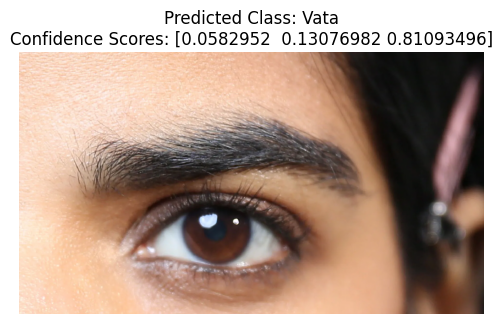

In [10]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model

# Load the saved DenseNet121 model
model_path = 'densenet121_best_model.h5'  # Replace with the actual path to your saved model
model = load_model(model_path)

def predict_and_display_image(image_path, model):
    """
    Predict the class of a single image using the loaded DenseNet121 model and display it.
    
    Parameters:
        image_path (str): Path to the image to predict.
        model (tensorflow.keras.Model): The trained DenseNet121 model.
    
    Returns:
        None
    """
    # Load the image
    img = cv2.imread(image_path)
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert BGR (OpenCV) to RGB (Matplotlib)
    
    # Resize the image to 224x224
    img_resized = cv2.resize(img, (128, 128))
    
    # Normalize the image (scale pixel values to [0, 1])
    img_resized = img_resized / 255.0
    
    # Ensure the image has 3 channels (for RGB), repeat if grayscale
    if img_resized.shape[-1] == 1:  # If the image is grayscale
        img_resized = np.repeat(img_resized, 3, axis=-1)
    
    # Add an extra dimension for the batch size (1 image in this case)
    img_input = np.expand_dims(img_resized, axis=0)
    
    # Predict with the model
    predictions = model.predict(img_input)
    
    # Get the class with the highest probability
    predicted_class = np.argmax(predictions, axis=1)
    
    # Map the predicted class to its label
    class_labels = ['Kapha', 'Pittha', 'Vata']
    predicted_label = class_labels[predicted_class[0]]
    
    # Display the image and prediction
    plt.figure(figsize=(6, 6))
    plt.imshow(img_rgb)
    plt.title(f"Predicted Class: {predicted_label}\nConfidence Scores: {predictions[0]}")
    plt.axis('off')
    plt.show()

# Example usage:
image_path = "C:/Users/kaush/Downloads/original.webp"# Replace with the actual path to your test image
predict_and_display_image(image_path, model)


1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step


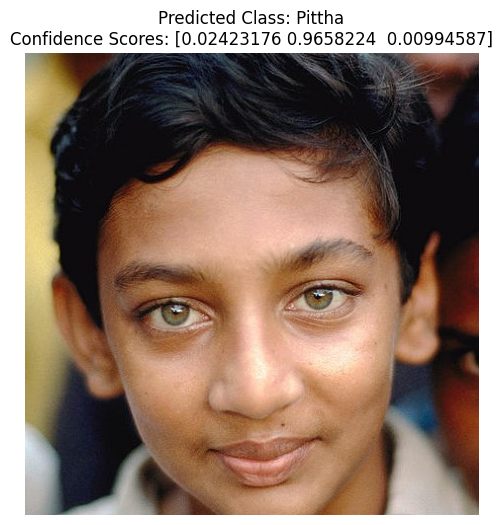

In [11]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model

# Load the saved DenseNet121 model
model_path = 'densenet121_best_model.h5'  # Replace with the actual path to your saved model
model = load_model(model_path)

def predict_and_display_image(image_path, model):
    """
    Predict the class of a single image using the loaded DenseNet121 model and display it.
    
    Parameters:
        image_path (str): Path to the image to predict.
        model (tensorflow.keras.Model): The trained DenseNet121 model.
    
    Returns:
        None
    """
    # Load the image
    img = cv2.imread(image_path)
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert BGR (OpenCV) to RGB (Matplotlib)
    
    # Resize the image to 224x224
    img_resized = cv2.resize(img, (128, 128))
    
    # Normalize the image (scale pixel values to [0, 1])
    img_resized = img_resized / 255.0
    
    # Ensure the image has 3 channels (for RGB), repeat if grayscale
    if img_resized.shape[-1] == 1:  # If the image is grayscale
        img_resized = np.repeat(img_resized, 3, axis=-1)
    
    # Add an extra dimension for the batch size (1 image in this case)
    img_input = np.expand_dims(img_resized, axis=0)
    
    # Predict with the model
    predictions = model.predict(img_input)
    
    # Get the class with the highest probability
    predicted_class = np.argmax(predictions, axis=1)
    
    # Map the predicted class to its label
    class_labels = ['Kapha', 'Pittha', 'Vata']
    predicted_label = class_labels[predicted_class[0]]
    
    # Display the image and prediction
    plt.figure(figsize=(6, 6))
    plt.imshow(img_rgb)
    plt.title(f"Predicted Class: {predicted_label}\nConfidence Scores: {predictions[0]}")
    plt.axis('off')
    plt.show()

# Example usage:
image_path = "C:/Users/kaush/Downloads/boy-with-green-eyes-india-wernher-krutein.jpg"# Replace with the actual path to your test image
predict_and_display_image(image_path, model)


1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step


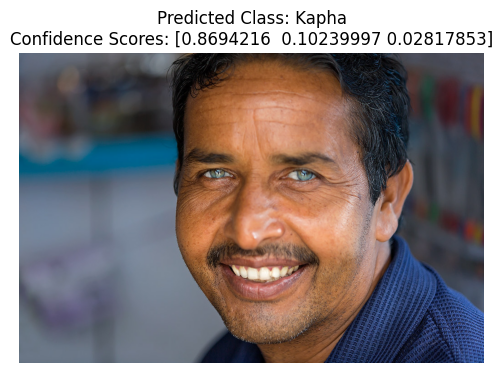

In [13]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model

# Load the saved DenseNet121 model
model_path = 'densenet121_best_model.h5'  # Replace with the actual path to your saved model
model = load_model(model_path)

def predict_and_display_image(image_path, model):
    """
    Predict the class of a single image using the loaded DenseNet121 model and display it.
    
    Parameters:
        image_path (str): Path to the image to predict.
        model (tensorflow.keras.Model): The trained DenseNet121 model.
    
    Returns:
        None
    """
    # Load the image
    img = cv2.imread(image_path)
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert BGR (OpenCV) to RGB (Matplotlib)
    
    # Resize the image to 224x224
    img_resized = cv2.resize(img, (128, 128))
    
    # Normalize the image (scale pixel values to [0, 1])
    img_resized = img_resized / 255.0
    
    # Ensure the image has 3 channels (for RGB), repeat if grayscale
    if img_resized.shape[-1] == 1:  # If the image is grayscale
        img_resized = np.repeat(img_resized, 3, axis=-1)
    
    # Add an extra dimension for the batch size (1 image in this case)
    img_input = np.expand_dims(img_resized, axis=0)
    
    # Predict with the model
    predictions = model.predict(img_input)
    
    # Get the class with the highest probability
    predicted_class = np.argmax(predictions, axis=1)
    
    # Map the predicted class to its label
    class_labels = ['Kapha', 'Pittha', 'Vata']
    predicted_label = class_labels[predicted_class[0]]
    
    # Display the image and prediction
    plt.figure(figsize=(6, 6))
    plt.imshow(img_rgb)
    plt.title(f"Predicted Class: {predicted_label}\nConfidence Scores: {predictions[0]}")
    plt.axis('off')
    plt.show()

# Example usage:
image_path = "C:/Users/kaush/Downloads/tumblr_d640ce287cfc90bca04fb5d7ec656471_b5ed8c6d_1280.jpg" # Replace with the actual path to your test image
predict_and_display_image(image_path, model)


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


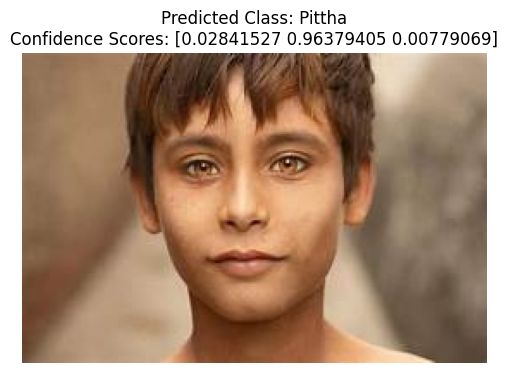

In [1]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model

# Load the saved DenseNet121 model
model_path = 'densenet121_best_model.h5'  # Replace with the actual path to your saved model
model = load_model(model_path)

def predict_and_display_image(image_path, model):
    """
    Predict the class of a single image using the loaded DenseNet121 model and display it.
    
    Parameters:
        image_path (str): Path to the image to predict.
        model (tensorflow.keras.Model): The trained DenseNet121 model.
    
    Returns:
        None
    """
    # Load the image
    img = cv2.imread(image_path)
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert BGR (OpenCV) to RGB (Matplotlib)
    
    # Resize the image to 224x224
    img_resized = cv2.resize(img, (128, 128))
    
    # Normalize the image (scale pixel values to [0, 1])
    img_resized = img_resized / 255.0
    
    # Ensure the image has 3 channels (for RGB), repeat if grayscale
    if img_resized.shape[-1] == 1:  # If the image is grayscale
        img_resized = np.repeat(img_resized, 3, axis=-1)
    
    # Add an extra dimension for the batch size (1 image in this case)
    img_input = np.expand_dims(img_resized, axis=0)
    
    # Predict with the model
    predictions = model.predict(img_input)
    
    # Get the class with the highest probability
    predicted_class = np.argmax(predictions, axis=1)
    
    # Map the predicted class to its label
    class_labels = ['Kapha', 'Pittha', 'Vata']
    predicted_label = class_labels[predicted_class[0]]
    
    # Display the image and prediction
    plt.figure(figsize=(6, 6))
    plt.imshow(img_rgb)
    plt.title(f"Predicted Class: {predicted_label}\nConfidence Scores: {predictions[0]}")
    plt.axis('off')
    plt.show()

# Example usage:
image_path = "C:/Users/kaush/Downloads/th (9).jpg" # Replace with the actual path to your test image
predict_and_display_image(image_path, model)


1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step


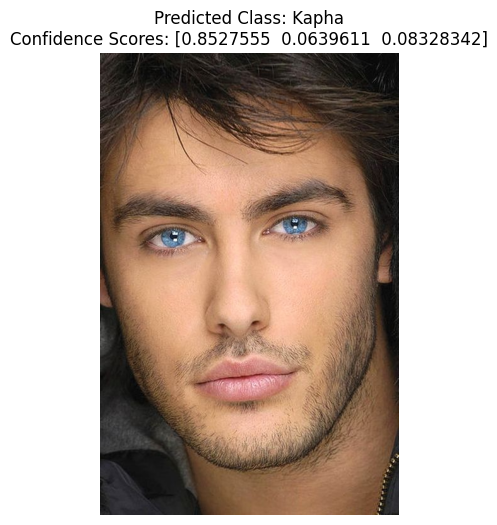

In [2]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model

# Load the saved DenseNet121 model
model_path = 'densenet121_best_model.h5'  # Replace with the actual path to your saved model
model = load_model(model_path)

def predict_and_display_image(image_path, model):
    """
    Predict the class of a single image using the loaded DenseNet121 model and display it.
    
    Parameters:
        image_path (str): Path to the image to predict.
        model (tensorflow.keras.Model): The trained DenseNet121 model.
    
    Returns:
        None
    """
    # Load the image
    img = cv2.imread(image_path)
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert BGR (OpenCV) to RGB (Matplotlib)
    
    # Resize the image to 224x224
    img_resized = cv2.resize(img, (128, 128))
    
    # Normalize the image (scale pixel values to [0, 1])
    img_resized = img_resized / 255.0
    
    # Ensure the image has 3 channels (for RGB), repeat if grayscale
    if img_resized.shape[-1] == 1:  # If the image is grayscale
        img_resized = np.repeat(img_resized, 3, axis=-1)
    
    # Add an extra dimension for the batch size (1 image in this case)
    img_input = np.expand_dims(img_resized, axis=0)
    
    # Predict with the model
    predictions = model.predict(img_input)
    
    # Get the class with the highest probability
    predicted_class = np.argmax(predictions, axis=1)
    
    # Map the predicted class to its label
    class_labels = ['Kapha', 'Pittha', 'Vata']
    predicted_label = class_labels[predicted_class[0]]
    
    # Display the image and prediction
    plt.figure(figsize=(6, 6))
    plt.imshow(img_rgb)
    plt.title(f"Predicted Class: {predicted_label}\nConfidence Scores: {predictions[0]}")
    plt.axis('off')
    plt.show()

# Example usage:
image_path = "C:/Users/kaush/Downloads/cc928123633220550bf53a32362f77a5--kostas-martakis-sexy-men.jpg" # Replace with the actual path to your test image
predict_and_display_image(image_path, model)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


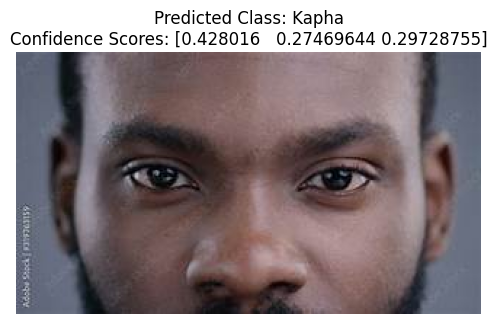

In [8]:
def predict_and_display_image_224(image_path, model):
    """
    Predict the class of a single image and display it.
    Image is resized to 224x224 before prediction.
    
    Parameters:
        image_path (str): Path to the image to predict.
        model (tensorflow.keras.Model): The trained model.
    
    Returns:
        None
    """
    # Load the image
    img = cv2.imread(image_path)
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert BGR (OpenCV) to RGB (Matplotlib)
    
    # Resize the image to 224x224
    img_resized = cv2.resize(img, (224, 224))
    
    # Normalize the image (scale pixel values to [0, 1])
    img_resized = img_resized / 255.0
    
    # Ensure the image has 3 channels (for RGB), repeat if grayscale
    if img_resized.shape[-1] == 1:  # If the image is grayscale
        img_resized = np.repeat(img_resized, 3, axis=-1)
    
    # Add an extra dimension for the batch size (1 image in this case)
    img_input = np.expand_dims(img_resized, axis=0)
    
    # Predict with the model
    predictions = model.predict(img_input)
    
    # Get the class with the highest probability
    predicted_class = np.argmax(predictions, axis=1)
    
    # Map the predicted class to its label
    class_labels = ['Kapha', 'Pittha', 'Vata']
    predicted_label = class_labels[predicted_class[0]]
    
    # Display the image and prediction
    plt.figure(figsize=(6, 6))
    plt.imshow(img_rgb)
    plt.title(f"Predicted Class: {predicted_label}\nConfidence Scores: {predictions[0]}")
    plt.axis('off')
    plt.show()

# Example usage:
image_path="C:/Users/kaush/Downloads/th (10).jpg"   # Replace with the actual path to your image
predict_and_display_image_224(image_path, model)


In [3]:
import numpy as np
from sklearn.metrics import classification_report
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Load the saved model
model = load_model("densenet121_best_model.h5")

# Create an ImageDataGenerator for the test data
test_datagen = ImageDataGenerator(rescale=1./255)
test_directory = 'C:/Users/kaush/Downloads/eyes dataset/train'  # Update with your test directory

# Create a test data generator
test_generator = test_datagen.flow_from_directory(
    test_directory,
    target_size=(128, 128),  # Ensure this matches the input size your model expects
    batch_size=32,
    class_mode='categorical',  # Assuming you have categorical labels
    shuffle=False  # Set to False for true labels to match predictions
)

# Get the true labels and predicted labels
true_labels = test_generator.classes  # The true labels
predictions = model.predict(test_generator, verbose=1)  # Get model predictions

# Convert predictions to class indices
predicted_classes = np.argmax(predictions, axis=1)

# Print the classification report
report = classification_report(true_labels, predicted_classes)
print(report)


Found 125 images belonging to 3 classes.
4/4 ━━━━━━━━━━━━━━━━━━━━ 8s 1s/step  
              precision    recall  f1-score   support

           0       0.71      0.16      0.26        32
           1       0.55      0.98      0.71        50
           2       0.83      0.56      0.67        43

    accuracy                           0.62       125
   macro avg       0.70      0.56      0.54       125
weighted avg       0.69      0.62      0.58       125



In [4]:
import os
import cv2
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Directories for the images

# Directories for each class
kapha_dir = r'C:\Users\kaush\Downloads\eyes dataset\train\kapha'
pittha_dir = r'C:\Users\kaush\Downloads\eyes dataset\train\pittha'
vata_dir = r'C:\Users\kaush\Downloads\eyes dataset\train\vata'



# Load and preprocess images
def load_images_from_folder(folder, label):
    images = []
    for filename in os.listdir(folder):
        img = cv2.imread(os.path.join(folder, filename))
        if img is not None:
            img = cv2.resize(img, (128, 128))  # Resize to 128x128
            images.append((img, label))  # Append image and its label as tuple
    return images

# Load images
kapha_images = load_images_from_folder(kapha_dir, 0)  
pittha_images = load_images_from_folder(pittha_dir, 1) 
vata_images =load_images_from_folder(vata_dir, 2) 


# Data Augmentation
import cv2
import random

import cv2
import random
import numpy as np

def augment_images(images, label):
    augmented_images = []
    for img, _ in images:
        # Get image dimensions
        h, w = img.shape[:2]
        
        # Random cropping
        x_start = random.randint(0, int(0.1 * w))  # Random start for the x-axis
        y_start = random.randint(0, int(0.1 * h))  # Random start for the y-axis
        cropped_img = img[y_start:y_start + h - 20, x_start:x_start + w - 20]
        cropped_img = cv2.resize(cropped_img, (w, h))  # Resize back to original dimensions
        augmented_images.append((cropped_img, label))
        
        # Scaling
        scaled_img = cv2.resize(img, None, fx=1.2, fy=1.2, interpolation=cv2.INTER_LINEAR)
        scaled_img = cv2.resize(scaled_img, (w, h))  # Resize back to original dimensions
        augmented_images.append((scaled_img, label))
        
        # Random perspective transformation
        pts1 = np.float32([[0, 0], [w-1, 0], [0, h-1], [w-1, h-1]])  # Original points
        pts2 = np.float32([[random.randint(0, w//4), random.randint(0, h//4)],
                           [random.randint(w-1-w//4, w-1), random.randint(0, h//4)],
                           [random.randint(0, w//4), random.randint(h-1-h//4, h-1)],
                           [random.randint(w-1-w//4, w-1), random.randint(h-1-h//4, h-1)]])  # Transformed points
        matrix = cv2.getPerspectiveTransform(pts1, pts2)
        perspective_img = cv2.warpPerspective(img, matrix, (w, h))
        augmented_images.append((perspective_img, label))
         # Random cropping
        x_start = random.randint(0, int(0.1 * w))  # Random start for the x-axis
        y_start = random.randint(0, int(0.1 * h))  # Random start for the y-axis
        cropped_img = img[y_start:y_start + h - 20, x_start:x_start + w - 20]
        cropped_img = cv2.resize(cropped_img, (w, h))  # Resize back to original dimensions
        augmented_images.append((cropped_img, label))
        
        # Scaling
        scaled_img = cv2.resize(img, None, fx=1.2, fy=1.2, interpolation=cv2.INTER_LINEAR)
        scaled_img = cv2.resize(scaled_img, (w, h))  # Resize back to original dimensions
        augmented_images.append((scaled_img, label))
        
        # Random perspective transformation
        pts1 = np.float32([[0, 0], [w-1, 0], [0, h-1], [w-1, h-1]])  # Original points
        pts2 = np.float32([[random.randint(0, w//4), random.randint(0, h//4)],
                           [random.randint(w-1-w//4, w-1), random.randint(0, h//4)],
                           [random.randint(0, w//4), random.randint(h-1-h//4, h-1)],
                           [random.randint(w-1-w//4, w-1), random.randint(h-1-h//4, h-1)]])  # Transformed points
        matrix = cv2.getPerspectiveTransform(pts1, pts2)
        perspective_img = cv2.warpPerspective(img, matrix, (w, h))
        augmented_images.append((perspective_img, label))

    return augmented_images



# Apply 
augmented_kapha_images = augment_images(kapha_images, 0)  # Label 0 for benign
augmented_pittha_images = augment_images(pittha_images, 1)  # Label 1 for malignant
augmented_vata_images = augment_images(vata_images, 2)  # Label 1 for malignant

# Combine original and augmented images
data = kapha_images + pittha_images + vata_images + augmented_pittha_images+augmented_kapha_images+augmented_vata_images
X, y = zip(*data)  # Unzip the list of tuples into separate lists
X = np.array(X)
y = np.array(y)


# Normalize images for VGG-16
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

import tensorflow as tf
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
X = X / 255.0  # Scale pixel values to [0, 1]

# Reshape X to 128x128x3 for VGG-16 input (duplicate channels if grayscale)
X_reshaped = np.repeat(X, 3, axis=-1) if X.shape[-1] == 1 else X

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_reshaped, y, test_size=0.2, random_state=42)

Epoch 1/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 33s 978ms/step - accuracy: 0.4149 - loss: 1.8107 - val_accuracy: 0.7143 - val_loss: 0.7200
Epoch 2/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 19s 887ms/step - accuracy: 0.6356 - loss: 0.8130 - val_accuracy: 0.8114 - val_loss: 0.5704
Epoch 3/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 17s 795ms/step - accuracy: 0.7650 - loss: 0.5681 - val_accuracy: 0.8629 - val_loss: 0.4384
Epoch 4/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 18s 827ms/step - accuracy: 0.8523 - loss: 0.4139 - val_accuracy: 0.8686 - val_loss: 0.4094
Epoch 5/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 16s 750ms/step - accuracy: 0.8837 - loss: 0.3746 - val_accuracy: 0.8971 - val_loss: 0.3169
Epoch 6/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 17s 755ms/step - accuracy: 0.8822 - loss: 0.3363 - val_accuracy: 0.8800 - val_loss: 0.2933
Epoch 7/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 17s 764ms/step - accuracy: 0.9321 - loss: 0.2292 - val_accuracy: 0.8914 - val_loss: 0.2671
Epoch 8/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 17s 798ms/step - accuracy: 0.9388 - loss: 0.2073 - val_accu

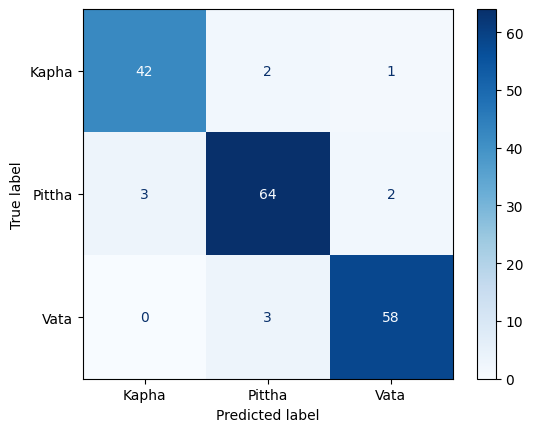

Accuracy: 93.71%
Classification Report:
              precision    recall  f1-score   support

       Kapha       0.93      0.93      0.93        45
      Pittha       0.93      0.93      0.93        69
        Vata       0.95      0.95      0.95        61

    accuracy                           0.94       175
   macro avg       0.94      0.94      0.94       175
weighted avg       0.94      0.94      0.94       175



In [5]:
import os
import cv2
import numpy as np
import random
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score, classification_report
import tensorflow as tf
from tensorflow.keras.applications import DenseNet121
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Flatten, Dense, Dropout, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt

# Build the DenseNet121 model
base_model = DenseNet121(weights='imagenet', include_top=False, input_shape=(128, 128, 3))

# Freeze the base model layers
base_model.trainable = False

# Add custom classification layers on top of DenseNet121
x = GlobalAveragePooling2D()(base_model.output)  # Use global average pooling instead of flattening
x = Dense(256, activation='relu')(x)  # Dense layer for feature learning
x = Dropout(0.5)(x)  # Dropout to prevent overfitting
output_layer = Dense(3, activation='softmax')(x)  # Output layer for 3 classes
model = Model(inputs=base_model.input, outputs=output_layer)

# Compile the model
model.compile(optimizer=Adam(), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

# Evaluate the model on test data
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)

# Confusion Matrix and Accuracy Score
cm = confusion_matrix(y_test, y_pred_classes)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Kapha', 'Pittha', 'Vata'])
disp.plot(cmap=plt.cm.Blues)
plt.show()

accuracy = accuracy_score(y_test, y_pred_classes)
print(f'Accuracy: {accuracy * 100:.2f}%')

# Print Precision, Recall, and F1-Score
report = classification_report(y_test, y_pred_classes, target_names=['Kapha', 'Pittha', 'Vata'])
print("Classification Report:")
print(report)
